In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from typing_extensions import Required
from os import listdir
from PIL import Image as PImage
import cv2
import numpy as np

from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
# import argparse  # No need for argparse in this context
import glob

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'

)

def augment_data(input_folder, output_folder, num_augmented_images = 100):
    if not os.path.exists(output_folder):
       os.makedirs(output_folder)
    images = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder , f ))]
    for image_name in images:
        image_path = os.path.join(input_folder , image_name)
        image = load_img(image_path)
        x = img_to_array(image)
        x = x.reshape((1,) + x.shape)
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=augmented_dir, save_prefix=image_name, save_format='jpg'):
            i += 1
            if i >= num_augmented_images:
                break



In [ ]:
!pip install tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from typing_extensions import Required
# Import the 'os' module
import os
from PIL import Image as PImage
import cv2
import numpy as np

from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
# import argparse  # No need for argparse in this context
import glob

# Initialize the ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

def augment_data(input_folder, output_folder, num_augmented_images=100):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    images = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

    for image_name in images:
        image_path = os.path.join(input_folder, image_name)
        image = load_img(image_path)
        x = img_to_array(image)
        x = x.reshape((1,) + x.shape)

        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_folder, save_prefix=image_name, save_format='jpg'):
            i += 1
            if i >= num_augmented_images:
                break

base_dir = '/content/drive/MyDrive/dataset_bacforclass/train'
augmented_dir = '/content/drive/MyDrive/augment'

bacteria_folders = ['anthracis', 'melitensis', 'pseudomallei', 'salmonella']

for bacteria_type in bacteria_folders:
    input_folder = os.path.join(base_dir, bacteria_type)
    output_folder = os.path.join(augmented_dir, bacteria_type)
    augment_data(input_folder, output_folder)

print("Data augmentation complete!")

Data augmentation complete!


In [ ]:
len(os.listdir(augmented_dir))

5

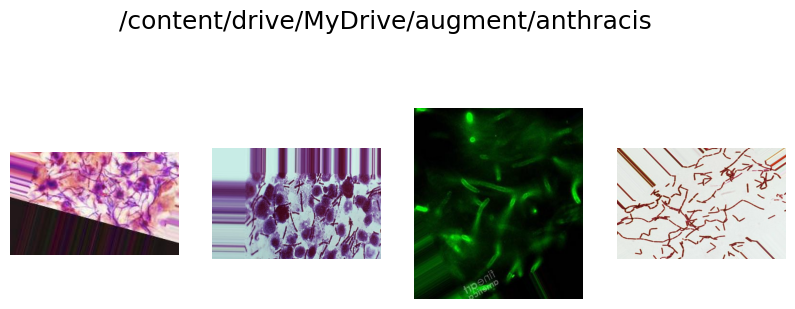

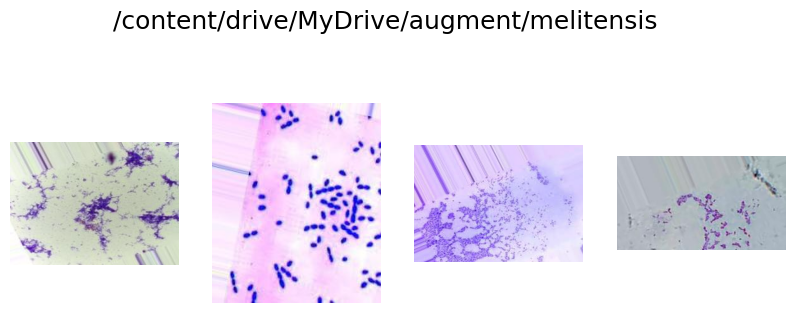

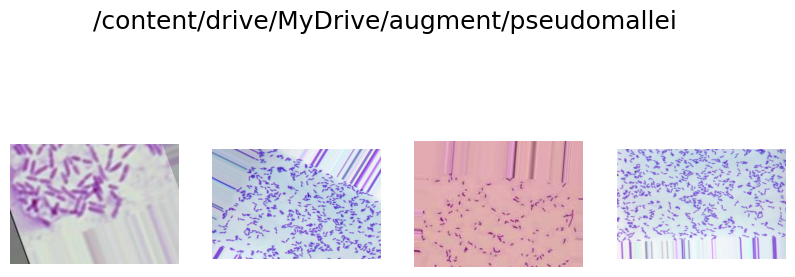

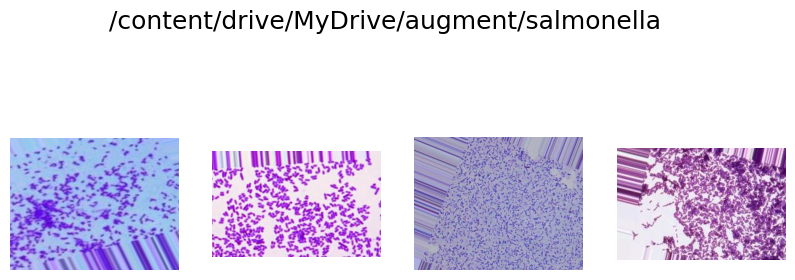

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
data_dir = '/content/drive/MyDrive/augment '       # Corrected directory name
CATEGORIES = ['/content/drive/MyDrive/augment/anthracis','/content/drive/MyDrive/augment/melitensis','/content/drive/MyDrive/augment/pseudomallei','/content/drive/MyDrive/augment/salmonella'] # Corrected category names


for category in CATEGORIES:
  path = os.path.join(data_dir , category)
  images = os.listdir(path)  # Now this should work with the corrected directory and category names

  fig , ax = plt.subplots(1, 4, figsize=(10, 4))
  fig.suptitle(f'{category}', fontsize = 18)

  for i in range(4):
            img_name = images[np.random.randint(0, len(images))]
            img_path = os.path.join(path, img_name)
            img_array = cv2.imread(img_path)

            ax[i].imshow( img_array)
            ax[i].axis('off')

In [ ]:
img_array.shape

(183, 275, 3)

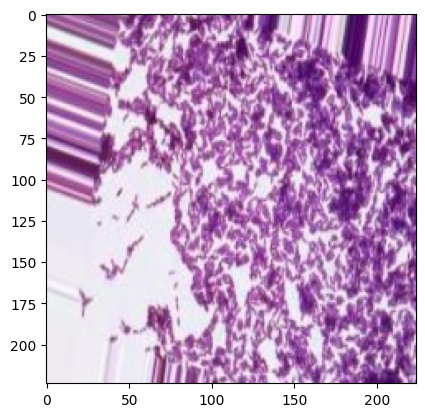

In [ ]:
IMG_SIZE = 224
new_array = cv2.resize(img_array , (IMG_SIZE , IMG_SIZE))
plt.imshow(new_array)

In [ ]:
new_array.shape

(224, 224, 3)

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
from fastai import *
from fastai.vision import *
from fastai.metrics import accuracy

In [ ]:
def get_databunch(tranform) :
  batchsize = 32
  sample = 5000
  np.random.seed(42)
  regex_pattern = r'.*\.jpg$'
  data = ImageDataBunch.from_folder(data_dir,
                                    random.sample(CATEGORIES, sample),
                                    regex_pattern ,
                                    ds_tfms = tranform,
                                    size = 224,
                                    ds = batchsize,

                                    )
  def get_ex() : return open_image(f'{data_dir}')

  def plots_f(row , cols , width, height , **kwargs) :
    [get_ex().apply_tfms(tranform[0] , **kwargs).show(ax=ax) for i , ax in enumerate(plt.subplots(row , cols , figsize = (width , height))[1].flatten())]
  return data

ใส่  label

In [ ]:
#creating training data
training_data = []

def create_training_data():
 for category in CATEGORIES:
       path = os.path.join(data_dir , category)
       labels = CATEGORIES.index(category)
       for img in os.listdir(path):
         try:
          img_array = cv2.imread(os.path.join(path , img))
          new_array = cv2.resize(img_array , (IMG_SIZE , IMG_SIZE))
          training_data.append([new_array , labels])
         except Exception as e:
          pass


create_training_data()

เช็ค train data

In [ ]:
len(training_data)

20316

In [ ]:
ตรวจสอบ ข้อมูล train& test

In [ ]:
x = []
y = []

for features , labels in training_data:
  x.append(features)
  y.append(labels)

In [ ]:
type(x) , type(y)

(list, list)

In [ ]:
x = np.array(x).reshape(-1 , IMG_SIZE , IMG_SIZE , 3)
y = np.array(y)

In [ ]:
type(x) , type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [ ]:
print(f'x_train Length : {x_train.shape[0]} , x_train Image size : {x_train.shape[1:3]}, x_train Channel Dimension : {x_train.shape[3]}')
print(f'x_test Length : {x_test.shape[0]} , x_test Image size : {x_test.shape[1:3]}, x_test Channel Dimension : {x_test.shape[3]}')

x_train Length : 16252 , x_train Image size : (224, 224), x_train Channel Dimension : 3
x_test Length : 4064 , x_test Image size : (224, 224), x_test Channel Dimension : 3


In [ ]:
training_data

[[array([[[105, 120,  21],
          [117, 124,  62],
          [156, 165, 143],
          ...,
          [119, 114,  69],
          [119, 114,  69],
          [117, 111,  66]],
  
         [[107, 124,  27],
          [114, 122,  58],
          [154, 163, 137],
          ...,
          [118, 110,  66],
          [118, 110,  66],
          [118, 111,  66]],
  
         [[118, 136,  42],
          [110, 119,  51],
          [152, 162, 132],
          ...,
          [121, 111,  64],
          [121, 111,  64],
          [123, 113,  66]],
  
         ...,
  
         [[142, 146,  87],
          [140, 146,  85],
          [138, 145,  84],
          ...,
          [115, 117,  95],
          [115, 117,  95],
          [115, 117,  95]],
  
         [[138, 142,  84],
          [140, 146,  84],
          [140, 148,  85],
          ...,
          [115, 117,  95],
          [115, 117,  95],
          [115, 117,  95]],
  
         [[142, 144,  85],
          [141, 145,  84],
          [138, 147,  84

In [ ]:
training_data[0]

[array([[[105, 120,  21],
         [117, 124,  62],
         [156, 165, 143],
         ...,
         [119, 114,  69],
         [119, 114,  69],
         [117, 111,  66]],
 
        [[107, 124,  27],
         [114, 122,  58],
         [154, 163, 137],
         ...,
         [118, 110,  66],
         [118, 110,  66],
         [118, 111,  66]],
 
        [[118, 136,  42],
         [110, 119,  51],
         [152, 162, 132],
         ...,
         [121, 111,  64],
         [121, 111,  64],
         [123, 113,  66]],
 
        ...,
 
        [[142, 146,  87],
         [140, 146,  85],
         [138, 145,  84],
         ...,
         [115, 117,  95],
         [115, 117,  95],
         [115, 117,  95]],
 
        [[138, 142,  84],
         [140, 146,  84],
         [140, 148,  85],
         ...,
         [115, 117,  95],
         [115, 117,  95],
         [115, 117,  95]],
 
        [[142, 144,  85],
         [141, 145,  84],
         [138, 147,  84],
         ...,
         [115, 117,  95],
  

array([[[166, 172, 134],
        [183, 196, 156],
        [188, 213, 169],
        ...,
        [206, 220, 202],
        [203, 217, 199],
        [199, 213, 195]],

       [[142, 137, 114],
        [172, 179, 147],
        [178, 198, 155],
        ...,
        [205, 219, 202],
        [202, 216, 198],
        [200, 214, 196]],

       [[122, 104, 105],
        [154, 149, 131],
        [176, 190, 151],
        ...,
        [203, 217, 199],
        [201, 215, 197],
        [201, 215, 197]],

       ...,

       [[194, 210, 186],
        [195, 211, 187],
        [196, 212, 188],
        ...,
        [184, 209, 181],
        [184, 209, 181],
        [184, 209, 181]],

       [[195, 211, 187],
        [195, 211, 187],
        [196, 212, 188],
        ...,
        [183, 208, 180],
        [184, 209, 181],
        [184, 209, 181]],

       [[195, 211, 187],
        [196, 212, 188],
        [197, 213, 189],
        ...,
        [183, 208, 180],
        [183, 208, 180],
        [185, 210, 182]]], dtype=uint8)
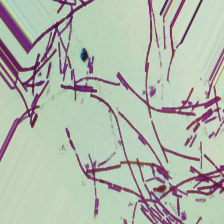

In [ ]:
x_train[0]